In [1]:
import csv
import argparse
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression

In [2]:
batting_data_path = 'bsb_ref.csv'
# INFO:
# 101,332 Players with up to 20 features each (exluding year, including team)
# if metric not reported for player, set to 0.0 by default

df = pd.read_csv(batting_data_path)
df = df.fillna(0)

In [3]:
# focusing on players after 1975
df_recent_players = df[df.year_ID >= 1975] #48k players

# find players with the highest number of years 
players = list(set(df_recent_players['name_common'])) # just a set of all players

# sorting by number of years active
sorted_players = sorted(players, key=lambda player: len(df_recent_players[df_recent_players['name_common'] == player]), reverse=True)




In [5]:
import random
# select 10 random players from the top 50 players in terms of number of years available
sample = random.sample(range(0, 50), 10)
players_to_analyze = [sorted_players[i] for i in sample]





            name_common   age    mlb_ID  player_ID  year_ID team_ID  stint_ID  \
68166  Terry Mulholland  23.0  119488.0  mulhote01     1986     SFG         1   
68167  Terry Mulholland  25.0  119488.0  mulhote01     1988     SFG         1   
68168  Terry Mulholland  26.0  119488.0  mulhote01     1989     PHI         2   
68169  Terry Mulholland  26.0  119488.0  mulhote01     1989     SFG         1   
68170  Terry Mulholland  27.0  119488.0  mulhote01     1990     PHI         1   
68171  Terry Mulholland  28.0  119488.0  mulhote01     1991     PHI         1   
68172  Terry Mulholland  29.0  119488.0  mulhote01     1992     PHI         1   
68173  Terry Mulholland  30.0  119488.0  mulhote01     1993     PHI         1   
68174  Terry Mulholland  31.0  119488.0  mulhote01     1994     NYY         1   
68175  Terry Mulholland  32.0  119488.0  mulhote01     1995     SFG         1   
68176  Terry Mulholland  33.0  119488.0  mulhote01     1996     PHI         1   
68177  Terry Mulholland  33.

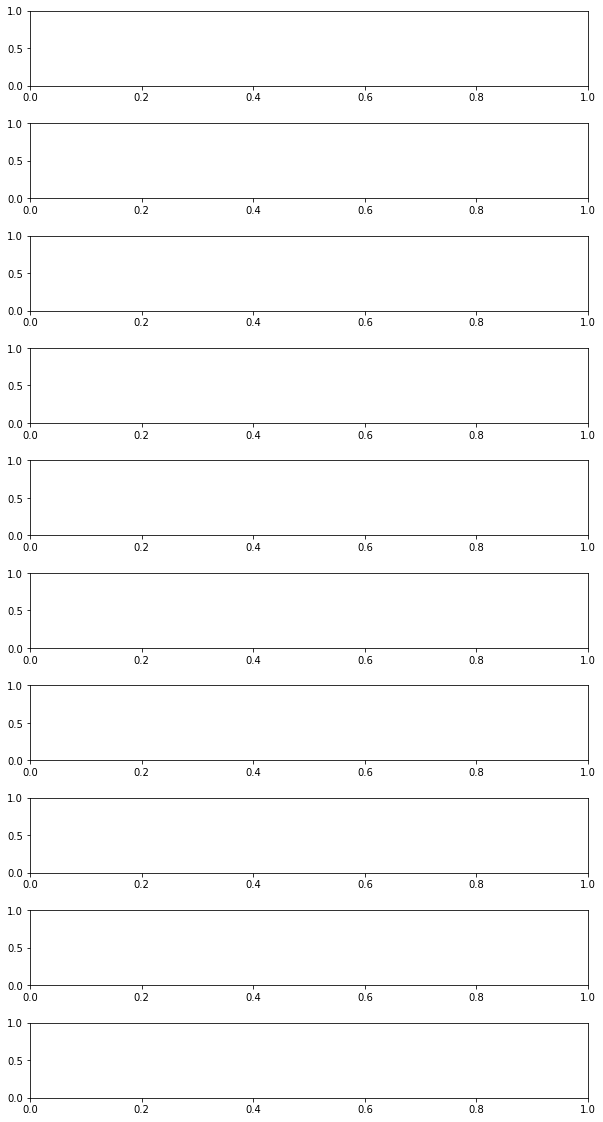

In [8]:
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression

fig, axs = plot.subplots(len(players_to_analyze), figsize=(10,20))
fig.subplots_adjust(hspace=.5)



for i, player in enumerate(players_to_analyze):
    ops_correlation = []
    # a list of all rows pertaining to a player
    player_stats = df_recent_players[df_recent_players['name_common'] == player]
    print(player_stats)
    x_data = player_stats['year_ID'].values.reshape(-1,1)
    y_data = player_stats['OPS_plus'].values.reshape(-1,1)
    print(x_data)

    
#     logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
#     logreg.fit(x_data, y_data)    
#     print('Score for ' + player + ' = ' + str(logreg.predict(x_data, y_data)))
    


#     axs[i].scatter(x_data, y_data, color = 'red')
#     axs[i].plot(x_data, logreg.predict(x_data), color = 'blue')
#     axs[i].set_title('OPS Score for '+ player)
#     axs[i].xlabel('OPS')
#     axs[i].ylabel('Year')
plot.show()
